In [1]:
import stanza
stanza.download('en')

2025-09-09 10:38:10 INFO: Downloaded file to C:\Users\atmiya\stanza_resources\resources.json
2025-09-09 10:38:10 INFO: Downloading default packages for language: en (English) ...
2025-09-09 10:38:11 INFO: File exists: C:\Users\atmiya\stanza_resources\en\default.zip
2025-09-09 10:38:15 INFO: Finished downloading models and saved to C:\Users\atmiya\stanza_resources


In [5]:
import stanza
nlp=stanza.Pipeline(lang='en',processors='tokenize,mwt,pos,lemma')

text="The children are lerning with thier toys and games are ongoing."

doc=nlp(text)

for sentence in doc.sentences:
    for word in sentence.words:
        print(word.text,'-->',word.lemma)

2025-09-09 10:42:43 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-09-09 10:42:43 INFO: Downloaded file to C:\Users\atmiya\stanza_resources\resources.json
2025-09-09 10:42:44 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |

2025-09-09 10:42:44 INFO: Using device: cpu
2025-09-09 10:42:44 INFO: Loading: tokenize
2025-09-09 10:42:44 INFO: Loading: mwt
2025-09-09 10:42:44 INFO: Loading: pos
2025-09-09 10:42:46 INFO: Loading: lemma
2025-09-09 10:42:46 INFO: Done loading processors!


The --> the
children --> child
are --> be
lerning --> lern
with --> with
thier --> thier
toys --> toy
and --> and
games --> game
are --> be
ongoing --> ongoing
. --> .


In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atmiya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
#sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser= SentimentIntensityAnalyzer()
sentences=[
    "I love this product!, it's anazing",
    "This is the worst product, i have ever seen",
    "This product is okay, no great but not bad either."
]

for text in sentences:
    scores=analyser.polarity_scores(text)
    print(text,'-->',scores)


I love this product!, it's anazing --> {'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.6696}
This is the worst product, i have ever seen --> {'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249}
This product is okay, no great but not bad either. --> {'neg': 0.104, 'neu': 0.39, 'pos': 0.506, 'compound': 0.7331}


Text(76.09722222222221, 0.5, 'amplitude')

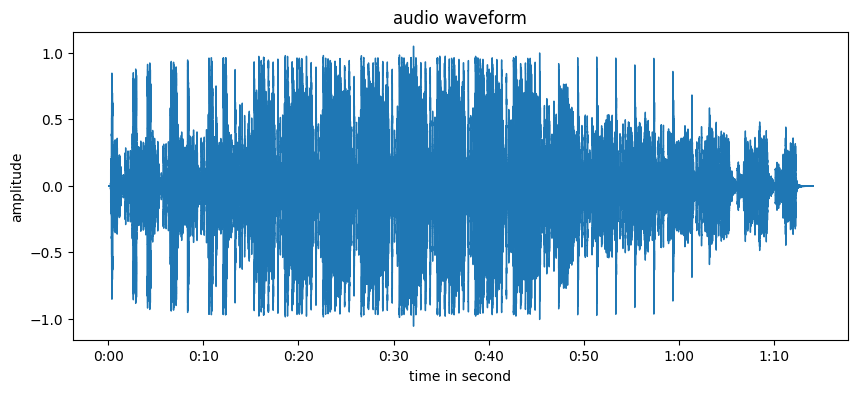

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_file='sample.mp3'
y,sr=librosa.load(audio_file)

plt.figure(figsize=(10,4))
librosa.display.waveshow(y,sr=sr)

plt.title('audio waveform')
plt.xlabel('time in second')
plt.ylabel('amplitude')

In [4]:
#synthesizing the music
import numpy as np
import sounddevice as sd
sr=44100
duration=2.0
freqs=440
t=np.linspace(0,duration,int (sr*duration),endpoint=False)
y=0.5*np.sin(2*np.pi*freqs*t)
sd.play(y,sr)
sd.wait()

In [7]:
#identifying the speaker
import numpy as np
import librosa
from sklearn.neighbors import KNeighborsClassifier
import sounddevice as sd
import soundfile as sf

def extract_features(file_path):
    y,sr=librosa.load(file_path,duration=3)
    mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)
    return np.mean(mfcc.t,axis=0)

train_file={
    'x':r"D:\sneha\ml\x.wav",
    'y':r"D:\sneha\ml\y.wav",
}
x,y=[],[]
for speaker,file in trian_files.items():
    features=extract_features(file)
    x.append(features)
    y.append(features)
model=KNeighborsClassifier(n,neighbors=1)
model.fit(x,y)
duration=3
print("say something")
recording=sd.rec(int(duration*44100),samplerate=44100,chennel=1)
sd.wait()
test_file="test_live.wav"
sf.write(test_file,recording,44100)
test_feature=extract_features(test_file)
predicted_feature=model.predict([test_feature])

NameError: name 'trian_files' is not defined